# A Very Quick Introduction to Machine Learning

We will start giving a formal definition of Machine Learning borrowed from [Tom Mitchell's 1997 Machine Learning textbook](http://www.cs.cmu.edu/~tom/mlbook.html), accompanied by a concrete example to make the terminology clearer.

**Definition**: A computer program is said to *learn* from experience **E** with respect to some class of tasks **T** and performance measure **P**, if its performance at tasks in T, as measured by P, improves with experience E.

If this sounds too abstract, and it should, an example will hopefully make it clearer. Suppose we want to write a program that learns to play [the game of Go](https://en.wikipedia.org/wiki/Go_(game). The program should improve its performance as measured by its ability to win at the class of tasks involving playing Go games, through experience obtained by playing games against itself.

In general, to have a well-defined learning problem, we must identify these three features: the class of tasks, the measure of performance to be improved and the source of training experience. In our Go example:

* **Task T**: playing Go.
* **Performance measure P**: percentage of games won against opponent.
* **Training experience E**: playing practice against itself.

In every single Machine Learning problem, the very same nomenclature will apply: in order to learn to do something well we need first to define that something (the task), define a suitable success (failure) measure and maximize (minimize) it through the inspection of a collection of training examples.

In general it's not possible to directly maximize the perfomance measure, thus we need to optimize a related quantity, usually referred to as the **loss** or **objective function**. For regression problems this can be, for example, the mean squared error. For classification problems the most frequently encountered, but by no means the only one, is the **categorical cross-entropy**. We don't need to go into any detail, but it's important to know that this is the quantity that we directly operate on.

## A simple (Linear) Classification Problem


In this exercise we will create a simple artificial dataset consisting of three partially overlapping clusters or "blobs" in a two-dimensional space. Each blob has a label, or class. Our goal is to build a classifier that can learn to discriminate these three classes by examining a dataset of observations.

Referring to the terminology introduced above we have:

* Task T: learn to discriminate the three classes.
* Performance measure P: the accuracy of the discrimination, i.e. the fraction of observation that we assign to the correct class.
* Training experience E: seeing a number of examples of members of each class.

We need to load several libraries in order to create our artificial dataset.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,7) # Make the figures a bit bigger

In [2]:
import sys
sys.path

['',
 '/anaconda/lib/python27.zip',
 '/anaconda/lib/python2.7',
 '/anaconda/lib/python2.7/plat-darwin',
 '/anaconda/lib/python2.7/plat-mac',
 '/anaconda/lib/python2.7/plat-mac/lib-scriptpackages',
 '/anaconda/lib/python2.7/lib-tk',
 '/anaconda/lib/python2.7/lib-old',
 '/anaconda/lib/python2.7/lib-dynload',
 '/anaconda/lib/python2.7/site-packages',
 '/anaconda/lib/python2.7/site-packages/Sphinx-1.5.6-py2.7.egg',
 '/anaconda/lib/python2.7/site-packages/aeosa',
 '/anaconda/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/anaconda/lib/python2.7/site-packages/IPython/extensions',
 '/Users/localadmin/.ipython']

The Scikit-Learn function `make_blobs` creates clusters of points of a given dimensionality. We can select the total number of points, the number of clusters, their centers, variances etc. Let's create a dataset consisting of 500 bidimensional observations partitioned into 3 groups. The `random_state=0` argument makes sure that the results are reproducible.

In [3]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)

We can visually inspect the blobs plotting a scatterplot. The three classes are shown in different colors.

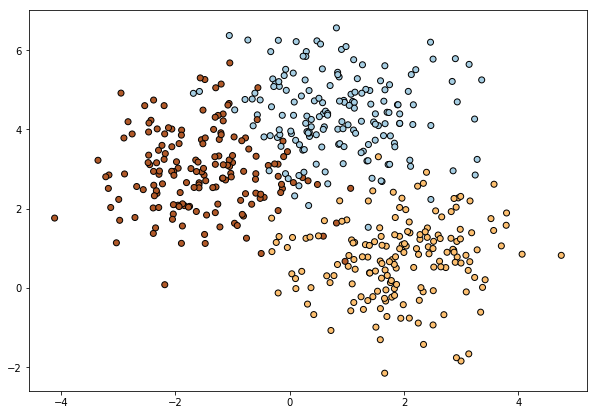

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

From the scatterplot we can see that, although generally well separated, the three groups are over overlapping.

## Learning vs. Memorizing

The goal of any classifier is to *learn* the characteristics of a dataset so that it can not only properly classify the data it has been trained on, but also, most importantly, *generalize* to new, unseen data. It would be trivial to create a classifier with 100% accuracy on our blobs dataset: we should just memorize the class of each data point. If, however, we were asked to predict the class of a new point given its coordinates, we wouldn't be able to answer unless the new points happens to have exactly the same coordinates as a point in our dataset.

A good generalization requires striking a balance between the amount of training data at our disposal and model complexity. Too simple a model, for example, assigning every new point to class 1, will obviously perform poorly. On the other hand a very complex model can perform perfectly on our datast, but terribly on new data points. Let's see an example of why this can happen. Let's assign new points to the class of the closest observation in our initial dataset. This is called a *K Nearest Neighbors Classifier*, where K indicates the number of neighbors we take into account. In our case K = 1. Without going into the details of the code, the plot below shows how the input space would be partitioned by this classifier.

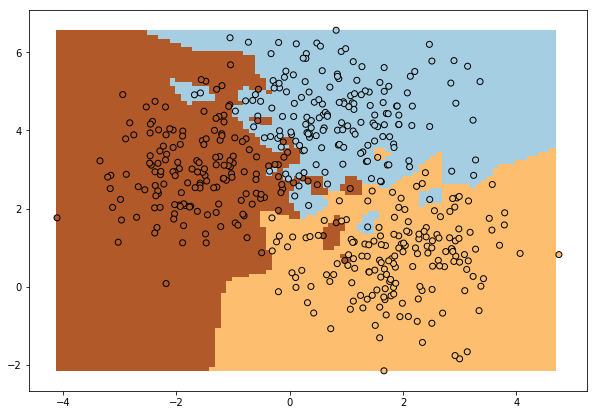

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1)) # Create a grid of x, y values
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict the class for each point of the grid
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

 The resulting classification boundaries are exceedingly complex, and we can se a number of "islands" of one class within other classes. The truth is that `make_blobs` creates compact gaussian clusters, without "holes" or "islands". The fact that we see them is due to the interaction of two factors:
 
 1. The model we have chosen is too complex.
 2. Our dataset contains a finite number of points.
 
When a learning algorithm learns not only the general characteristics of a dataset, but also the peculiarities due to its finite size, we say that it is **overfitting**. Overfitting is the most common cause of poor performance for machine learning algorithms.

What we need is a way to estimate how well our classifier will perform on new data. The canonical approach is to split the dataset in a **training set** and a **test set**. We will train the algorithm on the training set and assess its performance on the test set. For our problem, we will create a training set of 400 observations and a test set containing the remaining 100.

In [6]:
from sklearn.cross_validation import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=400, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((400, 2), (400,), (100, 2), (100,))

## Logistic Regression using Scikit-Learn

For our first experiment we will be using a [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) (LR) classifier. We will not go into the details of Logistic Regression, but the main idea is to create a *weighted sum* of the inputs, and use it as the input for a *non-linear* function. The figure below shows the case of five inputs and two classes. The *Sigmoid* function is our non-linearity, and returns a value between 0 and 1 that represents the probablility that our input belongs to class 1 (assuming that we have chosen class 1 as a reference).

![Logistic Regression](https://i.stack.imgur.com/bA57S.png)

The [Scikit-Learn implementation of LR](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) contains a parameter `C` to control the amount of *regularization*. In simple terms, regularizing amounts to controlling the influence of the individual weights by pushing them towards zero. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. Setting this coefficient to a large positive number amounts to having no regularization. We start creating an instance of the `LogisticRegression` classifier as shown below. 

**Feel free to try other values of C. Try for example C=1 and  C=0.1. Do the training and test scores change? If yes, how?**

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e5)

This instance doesn't know anything about our training set yet. To train the classifier we can use the `fit` method, and provide `X_train` and `y_train` as arguments. Under the hood `lr.fit` will modify the Logistic Regression tunable parameters in order to optimize a performance measure. It is possible to choose different algorithms for such optimization, but this is beyond the scope of this exercise, and we will use the default one.

In [8]:
lr.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The Logistic Regression model encapsulated in the `lr` object has now been trained We can estimate the accuracy of our classifier by accessing the `score` method of the `lr`. We can do it both for the training set and the test set.

In [9]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.94499999999999995, 0.92000000000000004)

We see that the accuracy on the training set is generally higher. This makes sense, since the model has been developed based on the samples in the training set. What matters, instead, is the performance on the test set. This is our estimate of how well the classifier would perform on new, unseen data *provided that they come from the same distribution*.

Overall, Logistic Regression seems to be able to do a good job at classifying the three blobs. We should not expect 100% accuracy since the blobs overlap. In other words there is an upper bound to the accuracy, and this simple classifier may already be close to it.

We can have a more visual idea of how Logistic Regression is discriminating the three groups by plotting the decision boundaries.

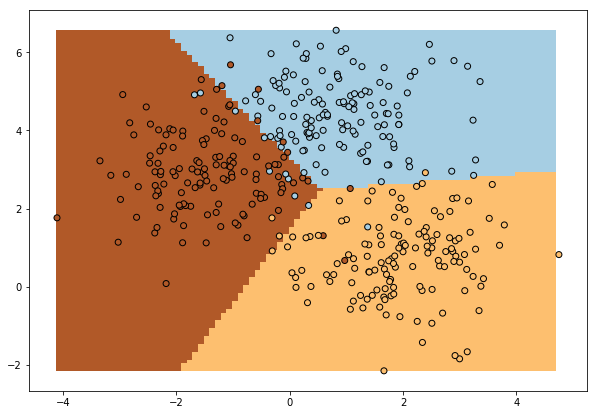

In [10]:
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1)) # Create a grid of x, y values
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict the class for each point of the grid
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

## Logistic regression Using Keras

We now introduce the Keras library, which we will be using in the course of all the next examples. Keras has a large number of classes and methods, but in what follows we will be using a small subset of them. For more details, you can consult [Keras excellent documentation](https://keras.io/).

In [11]:
from keras.models import Sequential

Using TensorFlow backend.


In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

The `Sequential` module contains the functions that we will need to build our networks. The `Dense` and `Activation` layers will become clearer in a minute. The `SGD` module stands for **Stochastic Gradient Descent**, and is one of a few of optimization algorithms available in Keras.

A Logistic Regression model can be expressed as a Neural Network. The diagram above illustrates a simple Neural Network with a single binary output neuron and a five inputs neurons ($x_1$,..., $x_5$) the elements of which are combined into a weighted sum $b + w_1 x_1 + \cdots w_5 x_5$ that is then passed to a non-linear function indicated by the sigmoid output neuron $y$. 

Our "blobs" example differs only in two respects:
1. Our input space is two-dimensional, not five-dimensional.
2. We have three classes, not two, therefore our output is a bit more complicated. We will need 3 output neurons, where the k-th output neuron returns the probability of the input of belonging to the k-th class.

Before building our model, it is often a good idea to **standardize the inputs**, in order to bring them to the same scale. Our inputs are already almost standardized, as we can see from the scatterplot above, but it's generally a good idea to perform this operation. We could do it by hand, but Scikit-Learn offers a handy function, `StandardScaler`, for this. We create a standardized training set `Z_train` and apply the same transformation to `X_test`. Note that we are centering and scaling `X_test` using the mean and variance estimated from `X_train`, not on `X_test`.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
Z_train = scaler.transform(X_train)
Z_test = scaler.transform(X_test)
print(Z_train.mean(axis=0))

[  9.60342916e-17   4.76285678e-16]


We can now start building our neural network. We need to create an instance of the `Sequential` class, to which we will add layers using the `add` method.

In [14]:
model = Sequential()

We need to add one single completely (or *densely*) connected layer. This means that each input node has a weight linking it to each of the outputs nodes. This is called a `Dense` layer. Every combination of input and output has a weight associated with it. 
We must specify the sizes of the input layer and of the output layer.

In [15]:
model.add(Dense(input_dim=2, output_dim=3))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3, input_dim=2)`
  """Entry point for launching an IPython kernel.


Now we need to specify the type of non-linearity associated with the output. The figure above shows a sigmoid, which is appropriate for binary problems. When the number of output classes is greater than two we need a different function, called `softmax`, which is an extension of the sigmoid function to more than two classes. We add this as an `Activation` layer.

In [16]:
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


The summary shows that we have 9 trainable parameters and not 6. This is because we have an additional node, called the `bias`, that has a weight connecting it to each of the output nodes, thus contributing three more weights.

We have built the model, but we need to provide some additional information:

1. The type of "loss" function we want to optimize. For a multi-class classification problem we use the `categorical cross-entropy` function.
2. How we want to minimize it, i.e., which optimization algorithm we want to use. We will be using the Stochastic Gradient Descent (`SGD`)
3. What performance metrics we want to read. We will be using the `accuracy`.

This information is communicated to Keras via the `model.compile` function.

In [17]:
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
              metrics=['accuracy'])

The `lr` parameter of `SGD` is the *learning rate*, and measures, so to speak, the "aggressiveness" of the optimizer. Larger values produce faster but potentially suboptimal results.

** Try to change the value of lr. What happens if lr=0.001? What happens if lr=1? Every time you change the value re-run the cells from `model = Sequential()` on.**

The optimization performed by SGD usually divides the training set into chunks called *mini-batches*. For a small dataset like this one this is not really necessary, but for larger datsets this chunking operation significantly accelerates the training step. We will use mini-batches of 50 observations. The period during which the model "sees" all the observations in the training set is called an **epoch**. We must decide for how many epochs we want to train. Let's start with 50 epochs. The accuracy will be measured on both the training and the test set.

There is one last thing we need to do before fitting the model. The labels (`y_train`) are the integers 0, 1, 2, but the output of our network is a vector of length 3 (the number of output neurons). We thus need to transform the labels into a so-called **one-hot encoded vector**. In this encoding class 1 is represented as `[1, 0, 0]`, class 2 as `[0, 1, 0]` and class 3 as `[0, 0, 1]`. Keras provides a utility function, `to_categorical`, that performs this transformation for us.

In [18]:
from keras.utils.np_utils import to_categorical
labels_train = to_categorical(y_train, 3)
labels_test = to_categorical(y_test, 3)

We can now train the network using the `fit` method.

In [19]:
history = model.fit(Z_train, labels_train, batch_size=50, nb_epoch=50, 
                    verbose=1, validation_data=(Z_test, labels_test))

/anaconda/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 400 samples, validate on 100 samples
Epoch 1/50
400/400 [==============================] - 0s - loss: 1.2141 - acc: 0.2900 - val_loss: 0.9292 - val_acc: 0.4600
Epoch 2/50
400/400 [==============================] - 0s - loss: 0.8872 - acc: 0.6125 - val_loss: 0.7157 - val_acc: 0.8000
Epoch 3/50
400/400 [==============================] - 0s - loss: 0.6982 - acc: 0.8125 - val_loss: 0.5918 - val_acc: 0.8300
Epoch 4/50
400/400 [==============================] - 0s - loss: 0.5839 - acc: 0.8850 - val_loss: 0.5128 - val_acc: 0.8900
Epoch 5/50
400/400 [==============================] - 0s - loss: 0.5092 - acc: 0.9175 - val_loss: 0.4587 - val_acc: 0.9000
Epoch 6/50
400/400 [==============================] - 0s - loss: 0.4571 - acc: 0.9325 - val_loss: 0.4195 - val_acc: 0.9000
Epoch 7/50
400/400 [==============================] - 0s - loss: 0.4187 - acc: 0.9350 - val_loss: 0.3899 - val_acc: 0.9300
Epoch 8/50
400/400 [==============================] - 0s - loss: 0.3893 - acc: 0.9375 - val_l

We can see that the final performance on the training and the test sets is the same one we observed using Scikit-Learn. We can plot how the loss and the accuracy of the model change through the epochs for the traning and the test set.

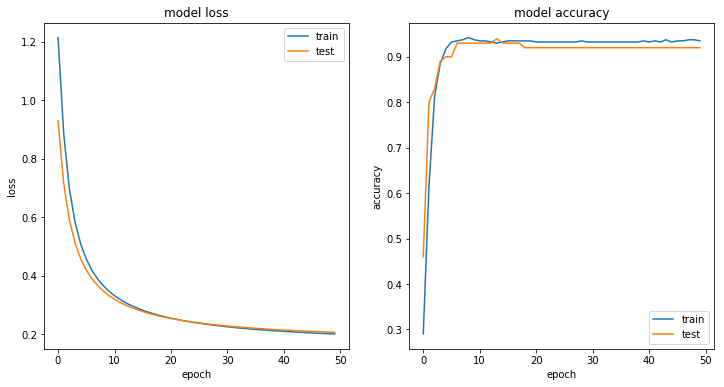

In [20]:
# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# ...and the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## The MNIST Dataset

The Mixed National Institute of Standards and Technology or [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is the "Hello World" of Deep Learning. It consists of 70,000 images of 28 by 28 pixels representing handwritten digits. The dataset is split into 60,000 training examples and 10,000 test images. Our goal is to create a system that can predict what the handwritten number in an image is. Our inputs are the pixel intensities. This means that we will have 28x28 = 784 inputs and 10 outputs, corresponding to the 10 digits 0,...,9. Our approach follows very closely [Xavier Snelgrove's tutorial](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb).

We start loading the data, that, conveniently, have already been split into training and test set.

In [21]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data("mnist.pkl.gz")
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

We can see a few examples below:

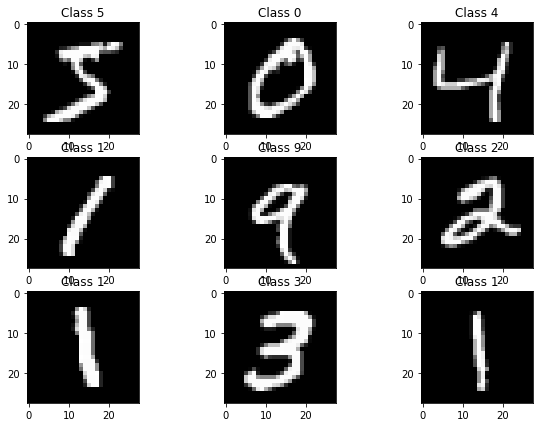

In [22]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

Similarly to what we did for the blobs, it is a good idea to scale the images. In this case we don't need to use the `StandardScaler` since the grey levels are all comprised between 0 and 255. We therefore divide by the maximum value. We also **flatten** the images into one-dimensional vectors of 784 elements. As you can imagine, all the two-dimensional information is lost.

In [23]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

We also need to convert the target variables `y_train` and `y_test` into one-hot-encoded vectors. Since we have 10 classes, these values will be 10 elements long.

In [24]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

### Logistic Regression on the MNIST dataset

Taking advantage of our experience with the blobs, we can try an almost identical logistic regression network, where we only need to change the sizes of the input and output layers. To save some time we will train for 25 epochs rather than 50. 
**Do you expect a high or a low accuracy? Make a guess and check**

In [25]:
mnist_lr = Sequential()
mnist_lr.add(Dense(input_dim=784, output_dim=10))
mnist_lr.add(Activation('softmax'))
sgd = SGD(lr=0.1)
mnist_lr.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history_mnist_lr = mnist_lr.fit(X_train, y_train, batch_size=128, nb_epoch=25, 
                                verbose=1, validation_data=(X_test, y_test))

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, input_dim=784)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 1s - loss: 0.5777 - acc: 0.8545 - val_loss: 0.3796 - val_acc: 0.8987
Epoch 2/25
60000/60000 [==============================] - 1s - loss: 0.3754 - acc: 0.8965 - val_loss: 0.3363 - val_acc: 0.9081
Epoch 3/25
60000/60000 [==============================] - 1s - loss: 0.3436 - acc: 0.9040 - val_loss: 0.3177 - val_acc: 0.9107
Epoch 4/25
60000/60000 [==============================] - 1s - loss: 0.3272 - acc: 0.9088 - val_loss: 0.3077 - val_acc: 0.9160
Epoch 5/25
60000/60000 [==============================] - 1s - loss: 0.3164 - acc: 0.9114 - val_loss: 0.3014 - val_acc: 0.9183
Epoch 6/25
60000/60000 [==============================] - 1s - loss: 0.3085 - acc: 0.9144 - val_loss: 0.2969 - val_acc: 0.9182
Epoch 7/25
60000/60000 [==============================] - 1s - loss: 0.3030 - acc: 0.9158 - val_loss: 0.2905 - val_acc: 0.9185
Epoch 8/25
60000/60000 [==============================] - 1s 

### Adding an Additional Layer to the Logistic Regression: Multilayer Perceptrons

We have seen that Logistic Regression create linear combinations of their inputs and pass them through a non-linear function only at the output. We can however introduce nonlinearities in the system by adding one or more layers between the input and the output. For historical reason these layers are called *hidden*. We can see if and how we increase our accuracy by adding a couple of hidden layers.

In [ ]:
mnist_mlp = Sequential()
mnist_mlp.add(Dense(512, input_shape=(784,)))
mnist_mlp.add(Activation('sigmoid'))
mnist_mlp.add(Dense(128))
mnist_mlp.add(Activation('sigmoid'))
mnist_mlp.add(Dense(10))
mnist_mlp.add(Activation('softmax'))
mnist_mlp.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history_mnist_mlp = mnist_mlp.fit(X_train, y_train, batch_size=128, nb_epoch=25, 
                                verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s - loss: 1.5814 - acc: 0.5752 - val_loss: 0.7981 - val_acc: 0.8200
Epoch 2/25
60000/60000 [==============================] - 4s - loss: 0.6011 - acc: 0.8473 - val_loss: 0.4631 - val_acc: 0.8779
Epoch 3/25
60000/60000 [==============================] - 4s - loss: 0.4285 - acc: 0.8834 - val_loss: 0.3866 - val_acc: 0.8876
Epoch 4/25
60000/60000 [==============================] - 4s - loss: 0.3724 - acc: 0.8948 - val_loss: 0.3424 - val_acc: 0.9025
Epoch 5/25
60000/60000 [==============================] - 4s - loss: 0.3427 - acc: 0.9021 - val_loss: 0.3213 - val_acc: 0.9087
Epoch 6/25
60000/60000 [==============================] - 4s - loss: 0.3236 - acc: 0.9063 - val_loss: 0.3039 - val_acc: 0.9130
Epoch 7/25
60000/60000 [==============================] - 4s - loss: 0.3095 - acc: 0.9100 - val_loss: 0.2929 - val_acc: 0.9146
Epoch 8/25
60000/60000 [==============================] - 4s 

Just adding a single hidden layer our performance has increased to about 98% on the test set. In many problems this may be considered more than enough. If however you are using such a system to process checks, you may want to push the accuracy as much as possible. The solution based on Convolutional Neural Networks that you will see next was used exactly for this task and, at some point, was responsible for processing 10% of all the checks emitted in the US.